In [13]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
from simulator import compute_liouvillian, get_spectral_components, calculate_spectrum

interactive(children=(FloatSlider(value=18.7, description='b0', max=50.0, min=1.0), FloatSlider(value=0.25, de…

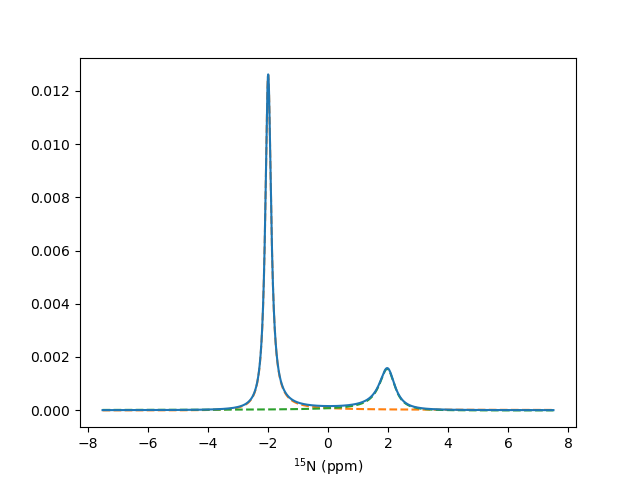

In [14]:
spectral_width = 15.0

# set up plot
fig, ax = plt.subplots()

@widgets.interact(b0=(1.0, 50.0, 0.1), kex=(0.0, 1e4, 10.0), pb=(0.0, 1.0, .01), wa=(-7.5, 7.5, 0.1), wb=(-7.5, 7.5, 0.1), r2a=(0.0, 100.0, 0.1), r2b=(0.0, 100.0, 0.1))
def update(b0=18.7, pb=0.25, kex=200.0, wa=-2.0, wb=2.0, r2a=10.0, r2b=10.0):
    liouvillian = compute_liouvillian(b0, pb, kex, wa, wb, r2a, r2b)
    spectral_components = get_spectral_components(liouvillian, pb)
    x, y, y1, y2 = calculate_spectrum(spectral_width, b0, spectral_components)

    """Remove old line from plot and plot new one"""
    # [l.remove() for l in ax.lines]
    ax.cla()
    ax.plot(x, y1, "--", color='C1')
    ax.plot(x, y2, "--", color='C2')
    ax.plot(x, y, color='C0')
    ax.set_xlabel("$^{15}$N (ppm)")
    fig.canvas.draw()
